# Ejemplo 1.1 de las notas de Anguiano
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Ejemplo 1.1

Aproximar $f(t)=\cos\left(\frac{\pi}{2}t\right)$ con un polinomio que coincida en $\{-1,0,1\}$

### Solución
Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/
* *ipywidgets*: Esta biblioteca proporciona herramientas interactivas para crear widgets en Jupyter Notebooks y JupyterLab. El sitio oficial es https://jupyter.org/
* *IPython*: Esta biblioteca proporciona funciones para mostrar varios tipos de objetos en la salida de un cuaderno de Jupyter, incluidos texto, imágenes, audio, video y widgets. La función "display" es comúnmente utilizada para mostrar objetos en la salida del cuaderno, lo que permite una presentación más rica y dinámica de los resultados y visualizaciones generadas por el código. El sitio oficial es https://jupyter.org/


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

Se construye el arreglo *numpy*  de la función   " *t* " que va a estar dentro del intervalo $-1\leq t\leq 1$.

In [6]:
# Vector de numpy de la variable independiente pidiendo al usuario que ingrese el vector
t = np.linspace(-1, 1, 100)

Se definen la cantidad de puntos para la aproximación

In [7]:
#Definir la cantidad de puntos a evaluar
n = 3
# Crear una lista para almacenar los puntos
puntos = [-1, 0, 1]

Se construye la función original

In [8]:
# Vector de numpy con la evaluación de la función que se quiere aproximar
f = np.cos(np.pi/2*t)

Graficamos la funcion original

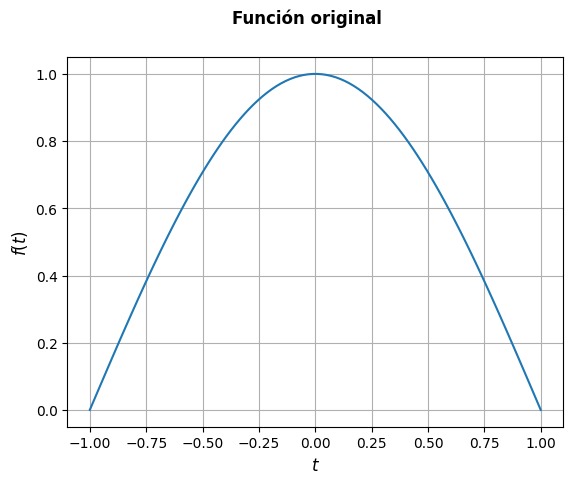

In [9]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función con respecto al vector de la variable independiente
plt.plot(t, f)

# Se edita la figura
plt.xlabel('$t$',fontsize=12) # Se escribe la etiqueta del eje de la variable indpendiente en tamaño de letra 12
plt.ylabel('$f(t)$',fontsize=12) # Se escribe la etiqueta del eje de la función en tamaño de letra 12
plt.suptitle('Función original', weight='bold') # Se escribe el título de la gráfica 
plt.grid() # Se grafica la cuadrícula

# Se muestra la figura
plt.show()

Definimos una función en la que establecemos al   $p_2 = 0$ , como variable para que pueda ser modificado con widgets, la funcion abarcara todas las operaciones y funciones que contengan a la variable.<br>
**NOTA:** Recordar que el indice en los arreglos empieza desde 0 por lo que el punto  $p_2$  es la posición 1 en el arreglo *puntos*

In [10]:
# Función para actualizar la gráfica
def grafica_interactiva(p2):
    puntos[1] = p2
    
    # Evaluar la función en los puntos ingresados por el usuario
    rhs = np.cos((np.pi / 2) * np.array(puntos))

    # Creamos la matriz que está en función de los puntos y del orden del polinomio
    M = np.vander(puntos, n, increasing=True)

    coef = np.matmul(np.linalg.inv(M),np.transpose(rhs))

    fa = np.polyval(np.flipud(coef), t)

    # Limpiar la figura anterior
    plt.clf()

    # Se grafica el vector de la función original con respecto al vector de la variable independiente
    plt.plot(t, f, label='$f(t)$')

    # Se grafica el vector de la función aproximada con respecto al vector de la variable independiente
    plt.plot(t, fa, label='$f_a(t)$')

    # Se edita la figura
    plt.xlabel('$t$', fontsize=12)  # Se escribe la etiqueta del eje de la variable independiente en tamaño de letra 12
    plt.suptitle('Comparación de la función original con la aproximada', weight='bold')  # Se escribe el título de la gráfica
    plt.grid()  # Se grafica la cuadrícula
    plt.legend()  # Se imprime la leyenda
    plt.show()

La grafica anterior solamente se guarda dentro de la función, pero no se imprime

Creamos y vinculamos el widget a la función, posteriormente llamamos a la función ya interactiva

In [ ]:
# Crear widget deslizante para modificar p1
widget = widgets.FloatSlider(
    value=0,
    min=-0.99,
    max=0.99,
    step=0.01,
    description='Valor de p2:',
    continuous_update=True
)

# Vincular el widget con la función actualizar_grafica
widgets.interactive(grafica_interactiva, p2=widget)

interactive(children=(FloatSlider(value=0.0, description='Valor de p2:', max=0.99, min=-0.99, step=0.01), Outp…